**Recreate Fig. 1 in https://arxiv.org/pdf/1707.03401.pdf**

In [3]:
%pylab inline
# Import solar abundances
import os
FS=16
os.chdir('/home/oliverphilcox/ChempyMulti/')
tng=np.load("/mnt/store1/oliverphilcox/ChempyMultiData/TNG_galaxy_all.npz")

Populating the interactive namespace from numpy and matplotlib


In [136]:
import h5py
file=h5py.File('Chempy/input/yields/TNG/AGB.hdf5')
list(file.keys())

['Masses',
 'Metallicities',
 'Number_of_masses',
 'Number_of_metallicities',
 'Number_of_species',
 'Reference',
 'Species_names',
 'Yield_names',
 'Yields']

In [140]:
list(file['Yields'].keys())

['Z_0.0001', 'Z_0.004', 'Z_0.008', 'Z_0.02']

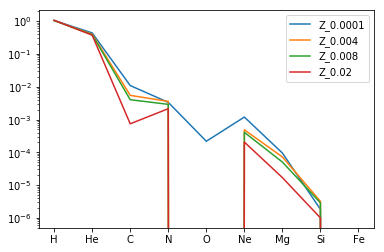

In [141]:
z_str = list(file['Yields'].keys())
for zz in z_str:
    Z=file['Metallicities'].value
    mass = file['Masses'].value
    init = np.asarray([0.76,0.24,0.,0,0,0,0,0,0])
    x=file['Yields'][zz]['Yield']

    yields=file['Yields/'+str(zz)+'/Yield'].value
    good_yields = np.concatenate([yields[:-3],yields[-1].reshape(1,-1)])

    def IMF(mass):
        m_norm = 1.
        A1 = 0.158
        A2 = 0.044
        x = 1.3
        mc = 0.079
        sigma = 0.692
        if mass<m_norm:
            return A1*np.exp(-(np.log(mass)-np.log(mc))**2./(2.*sigma**2.))
        else:
            return A2*mass**(-x)

    summ=0.
    els = ['H','He','C','N','O','Ne','Mg','Si','Fe']
    denom=np.zeros(len(els))
    for i,m in enumerate(mass):
        tmp_IMF = IMF(m)
        mass_yield = good_yields[:,i]+init*m
        summ+=mass_yield*tmp_IMF
        denom+=tmp_IMF*file['Yields/'+str(zz)+'/Ejected_mass'][i]
    weighted_yield = summ/denom #' normalize by ejected mass??'
    
    plt.plot(els,weighted_yield,label=zz)
plt.yscale('log')
plt.legend()

In [142]:
file.close()

In [126]:
els = ['H','He','C','N','O','Ne','Mg','Si','Fe']

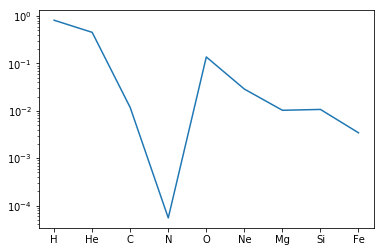

In [127]:
plt.plot(els,weighted_yield)
plt.yscale('log')

In [103]:
weighted_yield[[1:4,4]]

SyntaxError: invalid syntax (<ipython-input-103-f5ce47c970bc>, line 1)

ValueError: x and y must have same first dimension, but have shapes (9,) and (11,)

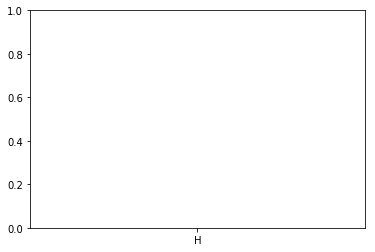

In [63]:
plt.plot(els,weighted_yield)

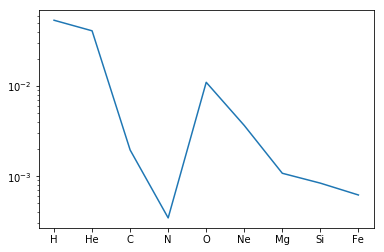

In [49]:
feedback=[]
els=['H','He','C','N','O','Ne','Mg','Si','Fe']
for el in els:
    feedback.append(np.sum(basic_ssp.sn2_table[el]))
plt.plot(els,feedback)
plt.yscale('log')

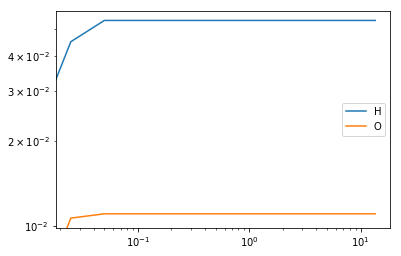

In [42]:
plt.plot(time_steps,np.cumsum(basic_ssp.sn2_table['H']), label = 'H')
plt.plot(time_steps,np.cumsum(basic_ssp.sn2_table['O']), label = 'O')
plt.yscale('log');plt.xscale('log');plt.legend();